An attempt to read and plot shallow profiler data.
First goal will be to plot p vs. t from the CTD (showing 9 profiles per day, 5 cm/s up, 10 cm/s down). Where was profiler during the eclipse at ~10:20 (local) on 8/21/18?

Ultimately plan to use NetCDF, but first try following JSON example (stolen unabashedly from Friedrich's 01_json_example.ipynb)...

-James Girton

(Already loaded username and token into .netrc file.)

In [2]:
import netrc
netrc = netrc.netrc()
remoteHostName = "ooinet.oceanobservatories.org"
info = netrc.authenticators(remoteHostName)
username = info[0]
token = info[2]

In [3]:
import requests
import datetime

Now, here's where the Oregon slope base shallow profiler CTD datastream is selected

(from info at http://ooi.visualocean.net/instruments/view/RS01SBPS-SF01A-2A-CTDPFA102):

In [4]:
subsite = 'RS01SBPS'
node = 'SF01A'
sensor = '2A-CTDPFA102'
method = 'streamed'
stream = 'ctdpf_sbe43_sample'
beginDT = '2017-08-21T07:01:01.000Z'
endDT = '2017-08-22T07:01:01.000Z'

In [5]:
base_url = 'https://ooinet.oceanobservatories.org/api/m2m/12576/sensor/inv/'

data_request_url ='/'.join((base_url,subsite,node,sensor,method,stream))
params = {
    'beginDT':beginDT,
    'endDT':endDT,
    'limit':20000,   
}

r = requests.get(data_request_url, params=params,auth=(username, token))
data = r.json()

In [6]:
len(data)

20001

This means samples have been decimated to 4.32 seconds. Should be good enough for viewing profiler behavior. How fast are they originally?

In [7]:
data[0]

{'conductivity': 1378198,
 'corrected_dissolved_oxygen': 93.0937928505425,
 'corrected_dissolved_oxygen_qc_executed': 29,
 'corrected_dissolved_oxygen_qc_results': 29,
 'density': 1027.3815442834657,
 'density_qc_executed': 29,
 'density_qc_results': 13,
 'driver_timestamp': 3712287660.601218,
 'ext_volt0': 15958,
 'ingestion_timestamp': 3712287663.835,
 'internal_timestamp': 0.0,
 'pk': {'deployment': 4,
  'method': 'streamed',
  'node': 'SF01A',
  'sensor': '2A-CTDPFA102',
  'stream': 'ctdpf_sbe43_sample',
  'subsite': 'RS01SBPS',
  'time': 3712287660.4515543},
 'port_timestamp': 3712287660.4515543,
 'practical_salinity': 33.94079865393371,
 'practical_salinity_qc_executed': 29,
 'practical_salinity_qc_results': 29,
 'preferred_timestamp': 'port_timestamp',
 'pressure': 713138,
 'pressure_temp': 24862,
 'seawater_conductivity': 3.496279739026694,
 'seawater_conductivity_qc_executed': 29,
 'seawater_conductivity_qc_results': 13,
 'seawater_pressure': 191.92393448509762,
 'seawater_pre

In [8]:
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import netCDF4 as nc
import numpy as np

In [23]:
time = []
pres = []
hour = []

for i in range(len(data)):
    time.append(nc.num2date(data[i]['time'],'seconds since 1900-01-01').replace(microsecond=0))
    pres.append(-data[i]['seawater_pressure'])
    hour.append((data[i]['time']-data[0]['time'])/3600)

In [21]:
hour = (time - time[0]) * 24;

TypeError: unsupported operand type(s) for -: 'list' and 'datetime.datetime'

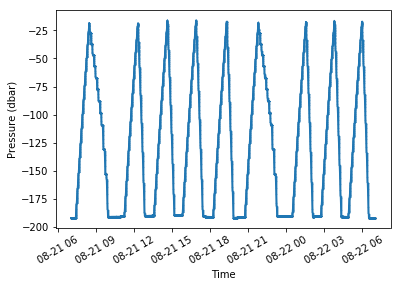

In [17]:
plt.plot(time, pres, marker=".", markersize=1, linestyle=None)
plt.ylabel('Pressure (dbar)')
plt.xlabel('Time')
plt.xticks(rotation=30)
#plt.tight_layout()
plt.show()

ok, I got a plot! But I'd like it to be bigger, not have to make p negative, and plot vs. hour of the day (local). Also maybe highlight eclipse period in a different color. Need to figure out how to do math on dates. Looks like the 4th down-profile went right through the ascending zooplankton plume during the eclipse.